In [64]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
data = pd.read_csv("../../day3-ecommerce-pandas-analysis-customer-segmentation/data/online_retail_clean.csv")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12


In [2]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12
...,...,...,...,...,...,...,...,...,...,...,...
805544,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12
805545,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
805546,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12
805547,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011,12


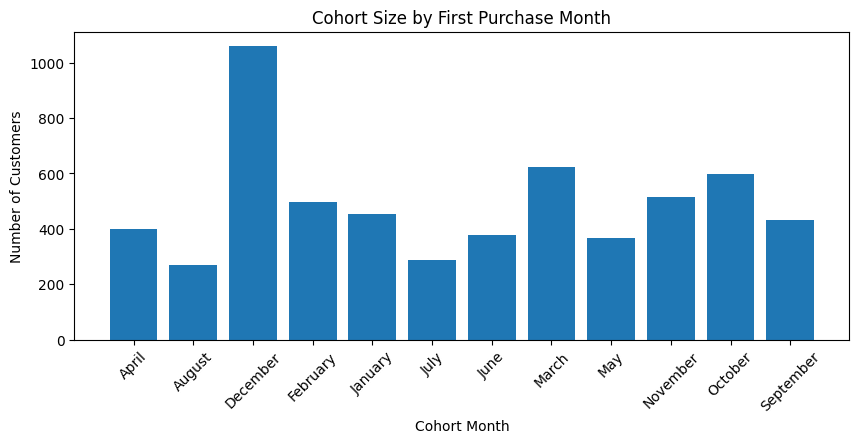

In [16]:
first_purchase_customers = (
    data.groupby(["Customer ID"])["InvoiceDate"].min().reset_index()
)
first_purchase_customers["MonthName"] = first_purchase_customers["InvoiceDate"].dt.month_name()
monthly_customers = (
    first_purchase_customers.groupby(["MonthName"])["Customer ID"].nunique().reset_index()
)
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(
    monthly_customers["MonthName"],
    monthly_customers["Customer ID"]
)

ax.set_title("Cohort Size by First Purchase Month")
ax.set_xlabel("Cohort Month")
ax.set_ylabel("Number of Customers")

plt.xticks(rotation=45)
plt.show()

In [38]:
first_purchase_customers = (
    data.groupby(["Customer ID"])["InvoiceDate"].min().reset_index()
)
first_purchase_customers["MonthName"] = first_purchase_customers["InvoiceDate"].dt.month_name()
first_purchase_customers.rename(columns={"InvoiceDate": "First Purchase Date"}, inplace=True)

data_with_first_purchase = data.merge(
    first_purchase_customers[["Customer ID", "First Purchase Date"]],
    on="Customer ID",
    how="left"
)
def define_cohort(x):
    if x == 1:
        return "First month"
    else:
        return f"{x} months later"
    
data_with_first_purchase["Cohort Index"] = (
    12 * (data_with_first_purchase["InvoiceDate"].dt.year - data_with_first_purchase["First Purchase Date"].dt.year) + 
    (data_with_first_purchase["InvoiceDate"].dt.month - data_with_first_purchase["First Purchase Date"].dt.month) + 1
)
data_with_first_purchase["Cohort Def"] = data_with_first_purchase["Cohort Index"].apply(define_cohort)
data_with_first_purchase.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,InvoiceYear,InvoiceMonth,MonthName,First Purchase Date,Cohort Index,Cohort Def
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12,December,2009-12-01 07:45:00,1,First month
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,December,2009-12-01 07:45:00,1,First month
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,December,2009-12-01 07:45:00,1,First month
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12,December,2009-12-01 07:45:00,1,First month
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12,December,2009-12-01 07:45:00,1,First month


In [77]:
data_with_first_purchase["Cohort Month"] = data_with_first_purchase["First Purchase Date"].dt.to_period("M")
unq_customer_each_cohort = (
    data_with_first_purchase.groupby(["Cohort Month", "Cohort Index"])["Customer ID"].nunique().reset_index()
)
cohort_matrix = unq_customer_each_cohort.pivot(
    index="Cohort Month",
    columns="Cohort Index",
    values="Customer ID"
)
unq_customer_each_cohort

,Cohort Month,Cohort Index,Customer ID
0,2009-12,1,955
1,2009-12,2,337
2,2009-12,3,319
3,2009-12,4,406
4,2009-12,5,363
...,...,...,...
320,2011-10,2,71
321,2011-10,3,35
322,2011-11,1,191
323,2011-11,2,27


In [71]:
cohort_size = cohort_matrix.iloc[:, 0]
retention_matrix = cohort_matrix.divide(cohort_size, axis=0)
retention_matrix

Cohort Index,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2009-12,1.00,0.35,0.33,0.43,0.38,0.36,0.38,0.34,0.34,0.36,...,0.30,0.26,0.30,0.28,0.26,0.26,0.32,0.30,0.41,0.20
2010-01,1.00,0.21,0.31,0.31,0.26,0.30,0.26,0.23,0.28,0.32,...,0.15,0.23,0.20,0.19,0.20,0.24,0.19,0.25,0.06,NaN
2010-02,1.00,0.24,0.22,0.29,0.25,0.20,0.19,0.29,0.25,0.28,...,0.20,0.16,0.16,0.14,0.23,0.23,0.16,0.06,NaN,NaN
2010-03,1.00,0.19,0.23,0.24,0.23,0.20,0.25,0.30,0.28,0.11,...,0.17,0.17,0.16,0.18,0.20,0.21,0.08,NaN,NaN,NaN
2010-04,1.00,0.19,0.19,0.16,0.18,0.22,0.28,0.26,0.11,0.11,...,0.16,0.14,0.15,0.18,0.22,0.06,NaN,NaN,NaN,NaN
2010-05,1.00,0.16,0.17,0.17,0.18,0.26,0.21,0.13,0.06,0.08,...,0.13,0.14,0.17,0.15,0.05,NaN,NaN,NaN,NaN,NaN
2010-06,1.00,0.17,0.19,0.20,0.23,0.29,0.13,0.09,0.08,0.12,...,0.12,0.13,0.20,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,1.00,0.16,0.18,0.30,0.29,0.14,0.11,0.15,0.15,0.11,...,0.17,0.24,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,1.00,0.20,0.30,0.32,0.17,0.12,0.10,0.12,0.14,0.13,...,0.20,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


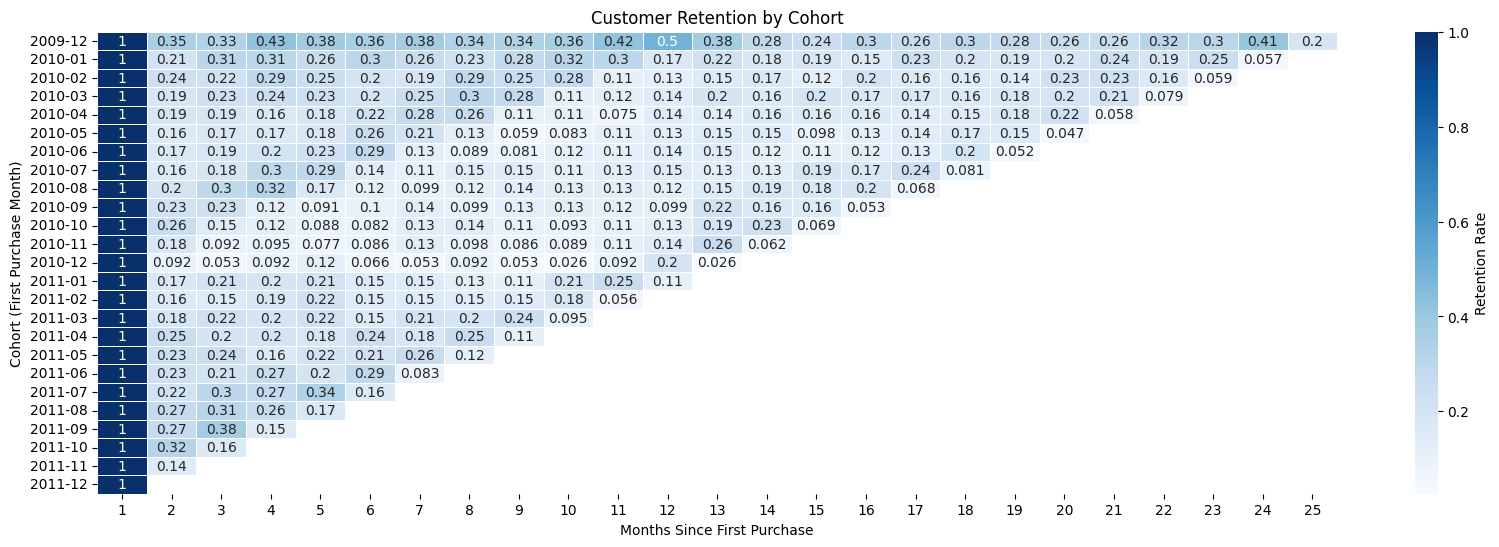

In [76]:
plt.figure(figsize=(20, 6))

sns.heatmap(
    retention_matrix,
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"label": "Retention Rate"}
)

plt.title("Customer Retention by Cohort")
plt.xlabel("Months Since First Purchase")
plt.ylabel("Cohort (First Purchase Month)")

plt.show()

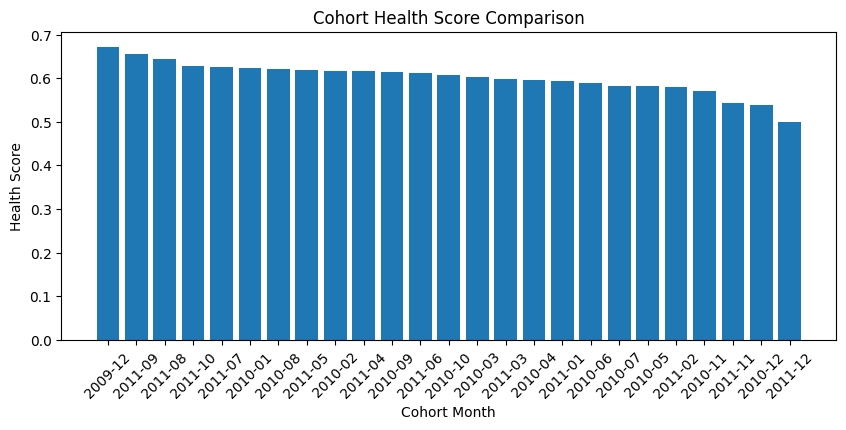

In [86]:
# Cohort Health Summary (Row-Level)
health_summary = retention_matrix.iloc[:, 0:3].copy()
health_summary.insert(0, "Cohort Size", cohort_size)
health_summary = health_summary.rename(
    columns={
        1: "Month 1 Retention",
        2: "Month 2 Retention",
        3: "Month 3 Retention"
    }
)
health_summary.fillna(0, inplace=True)
health_summary["Health Score"] = (
    health_summary["Month 1 Retention"] * 0.5 +
    health_summary["Month 2 Retention"] * 0.3 +
    health_summary["Month 3 Retention"] * 0.2
)

fig, ax = plt.subplots(figsize=(10, 4))

health_summary_sorted = health_summary.sort_values("Health Score", ascending=False)

ax.bar(
    health_summary_sorted.index.astype(str),
    health_summary_sorted["Health Score"]
)

ax.set_title("Cohort Health Score Comparison")
ax.set_xlabel("Cohort Month")
ax.set_ylabel("Health Score")

plt.xticks(rotation=45)
plt.show()

In [89]:
# Best vs Worst Cohorts (Ranking)
ranked_cohorts = health_summary.sort_values(
    "Health Score",
    ascending=False
)
best_cohorts = ranked_cohorts.head(3)
best_cohorts

worst_cohorts = ranked_cohorts.tail(3)
worst_cohorts

Cohort Index,Cohort Size,Month 1 Retention,Month 2 Retention,Month 3 Retention,Health Score
Cohort Month,,,,,
2011-11,100.00,1.00,0.14,0.00,0.54
2010-12,100.00,1.00,0.09,0.05,0.54
2011-12,100.00,1.00,0.00,0.00,0.50


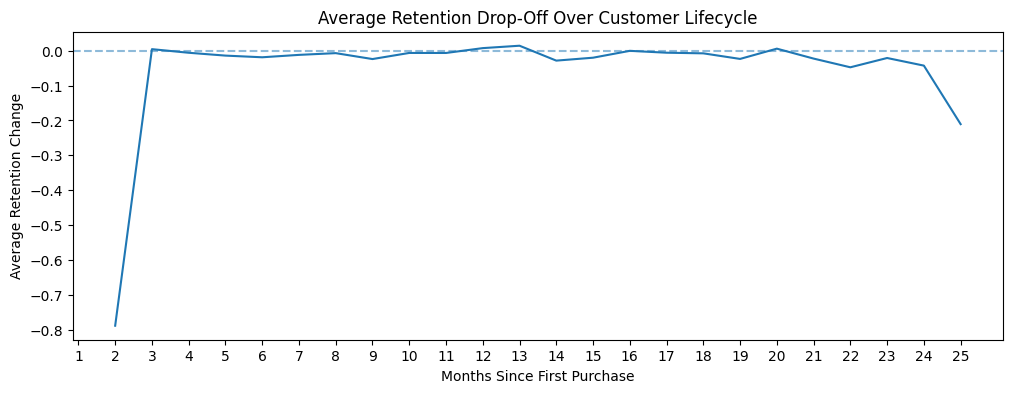

In [105]:
#Retention Drop-Off Analysis (Where do we lose users?)
dropoff_matrix = retention_matrix.diff(axis=1)
avg_dropoff_by_month = dropoff_matrix.mean(axis=0)

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(
    avg_dropoff_by_month.index.astype(str),
    avg_dropoff_by_month.values
)

ax.axhline(0, linestyle="--", alpha=0.5)

ax.set_title("Average Retention Drop-Off Over Customer Lifecycle")
ax.set_xlabel("Months Since First Purchase")
ax.set_ylabel("Average Retention Change")

plt.show()
